<a href="https://colab.research.google.com/github/pantos1/dopp_ex3_city_livability/blob/master/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt
from nltk import agreement


# Data-oriented programming paradigms
## Exercise 3 - Tasks 1 and 2
### Group 4

Piotr Antosiuk

Husein Gagajew 11775804

Johannes Fesl 11708466

## Loading Data
### Mercer Data:

In [2]:
def load_mercer_data():
    files = glob.glob('data/mercer_*.csv')
    datalist = []
    for file in files:
        year = int(file[12:16])
        df = pd.read_csv(file, sep=';', header=0, encoding='ISO-8859-1').assign(year=year)
        datalist.append(df)
        
    data = pd.concat(datalist)
    data.sort_values(['year'], ascending=True, inplace=True)
    data.set_index(['year', 'City'], inplace=True)
    data.index.set_names(['year', 'City'], inplace=True)
    return data

mercer_data = load_mercer_data()
mercer_data

Country  Rank
year City                                  
2010 Vienna                   Austria     1
     Canberra               Australia    26
     Calgary                   Canada    28
     Singapore              Singapore    28
     Stuttgart                Germany    30
     Honolulu           United States    31
     Adelaide               Australia    32
     San Francisco      United States    32
     Paris                     France    34
     Helsinki                 Finland    35
     Boston             United States    37
     Lyon                      France    38
     London            United Kingdom    39
     Tokyo                      Japan    40
     Kobe                       Japan    41
     Milan                      Italy    41
     Barcelona                  Spain    44
     Lisbon                  Portugal    45
     Washington, D.C.   United States    45
     Chicago            United States    45
     New York City      United States    49
     Seattle            United States    50
     Dublin                   Ireland    26
     Nuremberg                Germany    24
     Brisbane               Australia    36
     Hamburg                  Germany    23
     Oslo                      Norway    24
     Geneva               Switzerland     3
     Vancouver                 Canada     3
     Auckland             New Zealand     4
...                               ...   ...
2019 Vienna                   Austria     1
     Zagreb                   Croatia    98
     Montreal                  Canada    21
     Stockholm                 Sweden    23
     Nuremberg                Germany    23
     Singapore              Singapore    25
     Madrid                     Spain    46
     Seattle            United States    46
     Edinburgh         United Kingdom    45
     New York City      United States    44
     Barcelona                  Spain    43
     Milan                      Italy    41
     London            United Kingdom    41
     Lyon                      France    40
     Paris                     France    39
     Lisbon                  Portugal    37
     Chicago            United States    49
     Honolulu           United States    37
     Brisbane               Australia    35
     San Francisco      United States    34
     Dublin                   Ireland    33
     Calgary                   Canada    32
     Helsinki                 Finland    31
     Canberra               Australia    30
     Adelaide               Australia    29
     Brussels                 Belgium    28
     Stuttgart                Germany    27
     Oslo                      Norway    25
     Boston             United States    36
     Wroclaw                   Poland   100

[347 rows x 2 columns]

## Numbeo data

In [3]:
def load_numbeo_city_data():
    files = glob.glob('data/numbeo/quality-of-life-city/*.csv')
    datalist = []
    for file in files:
        year = int(file[33:37])
        df = pd.read_csv(file, sep=';', header=0).assign(year=year)
        city_parts = df['City'].str.split(',', n = 1, expand = True)
        df['City'] = city_parts
        df['Country'] = city_parts[len(city_parts.columns) - 1]
        datalist.append(df)
        
    data = pd.concat(datalist)
    data.sort_values(['year'], ascending=True, inplace=True)
    data.set_index(['year', 'City'], inplace = True)
    data.index.set_names(['year', 'City'], inplace = True)
    return data

numbeo_city_data = load_numbeo_city_data()
numbeo_city_data

Rank  Quality of Life Index  Purchasing Power Index  \
year City                                                                  
2012 Berlin             1                 215.25                  140.62   
     Pune              34                  69.20                   60.16   
     Istanbul          35                  55.71                   58.80   
     Warsaw            36                  51.96                   62.54   
     Budapest          37                  49.37                   39.19   
     London            38                  45.74                   87.96   
     Kuala Lumpur      39                  44.40                   78.15   
     Chennai           40                  43.74                   64.37   
     Delhi             41                  35.91                   62.99   
     Sofia             42                  30.03                   37.21   
     Thessaloniki      43                  26.77                   39.04   
     Bogota            44                  22.54                   24.72   
     Milan             45                  13.59                   71.07   
     Mumbai            46                   8.41                   56.67   
     Sao Paulo         47                   7.01                   46.67   
     Belgrade          48                   5.63                   32.04   
     Santiago          49                   5.54                   44.88   
     Buenos Aires      50                   5.03                   38.77   
     Rio de Janeiro    51                   3.71                   43.93   
     Bangkok           52                  -6.17                   30.29   
     Mexico City       53                 -15.08                   48.64   
     Bucharest         54                 -17.36                   36.31   
     Rome              55                 -21.48                   56.24   
     Cairo             57                 -35.66                   18.35   
     Tehran            58                 -50.44                   47.52   
     Moscow            59                 -54.72                   46.75   
     Kolkata           60                 -74.08                   49.55   
     Shanghai          61                 -76.15                   40.91   
     Paris             33                  72.12                   80.08   
     Johannesburg      32                  75.67                   97.31   
...                   ...                    ...                     ...   
2019 Washington        85                 166.58                  126.08   
     Berlin            84                 166.80                  104.74   
     Indianapolis      83                 166.91                  116.83   
     San Francisco     57                 175.88                  134.05   
     Tallinn           58                 175.51                   75.29   
     Tucson            59                 175.03                  115.99   
     Leeds             60                 175.02                  113.13   
     Kelowna           61                 174.26                  105.57   
     Dubai             62                 174.04                  133.54   
     Amsterdam         63                 173.29                   96.16   
     Frankfurt         64                 172.95                  119.06   
     Edmonton          65                 172.90                  119.88   
     Orlando           66                 172.42                  115.68   
     Halifax           68                 172.05                   96.73   
     Auckland          69                 171.51                   96.88   
     Vancouver         70                 171.25                   91.45   
     Ljubljana         71                 171.22                   72.81   
     Tokyo             72                 171.18                  102.66   
     Pittsburgh        73                 171.14                  109.13   
     Houston           74                 171.00                  146

In [4]:
def load_numbeo_country_data():
    files = glob.glob('data/numbeo/quality-of-life-country/*.csv')
    datalist = []
    for file in files:
        year = file[36:40]
        df = pd.read_csv(file, sep=';', header=0).assign(year=year)
        datalist.append(df)
        
    data = pd.concat(datalist)
    
    data.set_index(['year', 'Country'], inplace = True)
    data.index.set_names(['year','Country'], inplace = True)
    return data

numbeo_country_data = load_numbeo_country_data()
numbeo_country_data

Rank  Quality of Life Index  \
year Country                                               
2012 Switzerland                1                 194.11   
     Germany                    2                 184.42   
     Norway                     3                 183.43   
     United Arab Emirates       4                 177.07   
     New Zealand                5                 174.28   
     Sweden                     6                 171.72   
     Canada                     7                 164.99   
     Denmark                    8                 163.12   
     Australia                  9                 162.03   
     Austria                   10                 159.89   
     Netherlands               11                 158.07   
     United States             12                 140.62   
     Japan                     13                 130.52   
     Ireland                   14                 125.14   
     Slovenia                  15                 121.94   
     France                    16                 119.51   
     Israel                    17                 118.25   
     United Kingdom            18                 110.09   
     Portugal                  19                 105.10   
     Spain                     20                 100.93   
     Belgium                   21                 100.68   
     Croatia                   22                  93.06   
     Czech Republic            23                  88.14   
     Singapore                 24                  87.08   
     South Africa              25                  83.59   
     Saudi Arabia              26                  71.02   
     Turkey                    27                  66.70   
     Malaysia                  28                  65.31   
     Poland                    29                  60.63   
     Mexico                    30                  60.31   
...                           ...                    ...   
2019 Taiwan                    42                 133.82   
     Bulgaria                  43                 130.59   
     Turkey                    44                 125.51   
     Bosnia And Herzegovina    45                 124.51   
     Chile                     46                 124.14   
     Mexico                    47                 123.48   
     Argentina                 48                 122.49   
     Malaysia                  49                 122.11   
     Georgia                   50                 120.90   
     Serbia                    51                 119.83   
     India                     52                 117.51   
     Panama                    53                 113.12   
     Jordan                    54                 112.94   
     Lebanon                   55                 111.21   
     Macedonia                 56                 110.64   
     Colombia                  57                 108.36   
     Indonesia                 58                 107.20   
     Russia                    59                 104.94   
     Pakistan                  60                 104.63   
     Thailand                  61                 103.26   
     Ukraine                   62                 102.34   
     Hong Kong                 63                 100.90   
     Brazil                    64                 100.33   
     China                     65                  97.92   
     Sri Lanka                 66                  95.30   
     Philippines               67                  90.73   
     Vietnam                   68                  88.82   
     Kazakhstan                69                  87.17   
     Iran                      70                  87.02   
     Egypt                     71                  83.98   

                             Purchasing Power Index  Safety Index  \
year Country                                                        
2012 Switzerland                             127.42         74.22   
     Germany                             

# How do city quality of life rankings change over time (e.g. Mercer,Quality of Life Index Numbeo)?
## Visualization of Ranking Changes in Mercer-Data:

This functions split the data into the median of all cities, and visualize the ranking changes for these cities  so that not all cities are displayed in one graph.
As you can see, the ranking differences get bigger when the rank of the cities is higher. But all in all, the rankings remain pretty stable over the years.

C:\Users\Piotr\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1001: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=2019.0, right=2019.0
  ax.set_xlim(left, right)
C:\Users\Piotr\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1001: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=2019.0, right=2019.0
  ax.set_xlim(left, right)


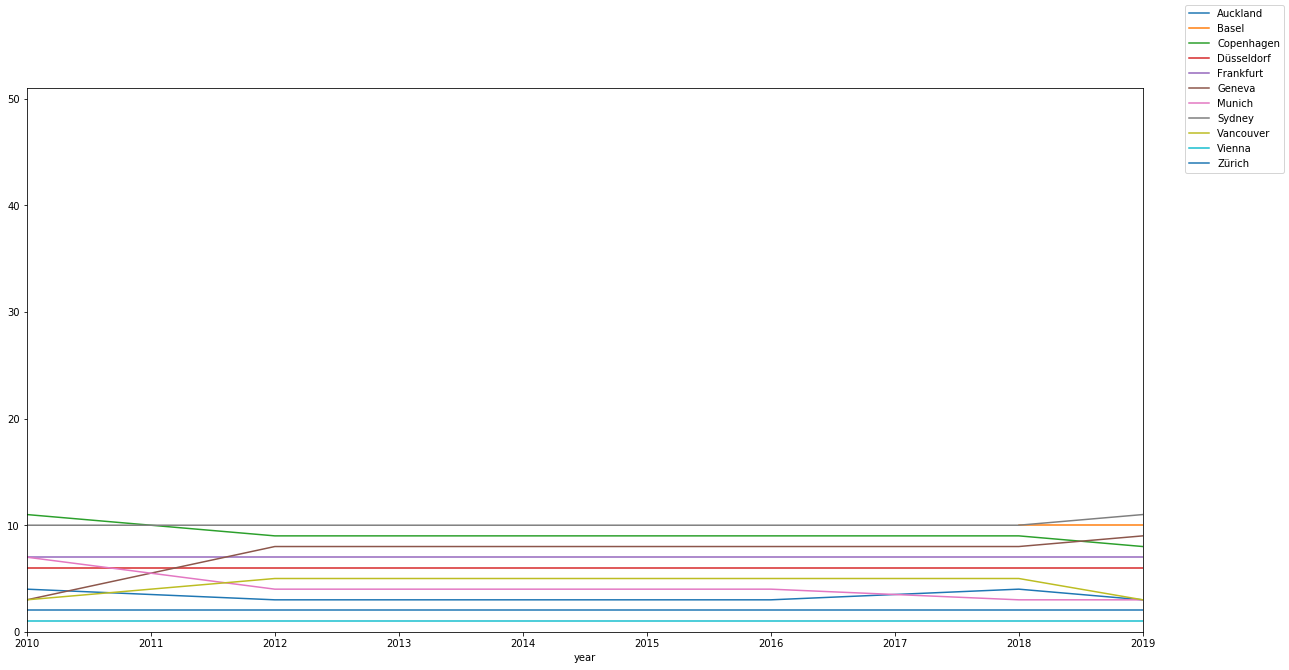

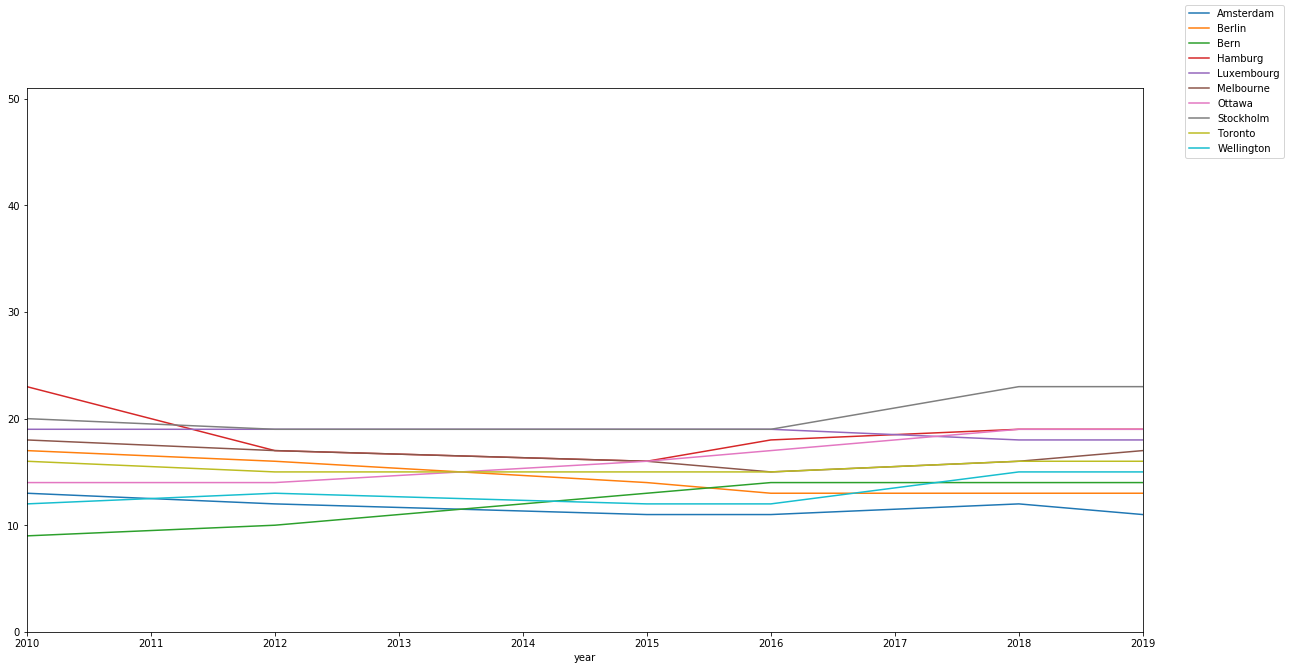

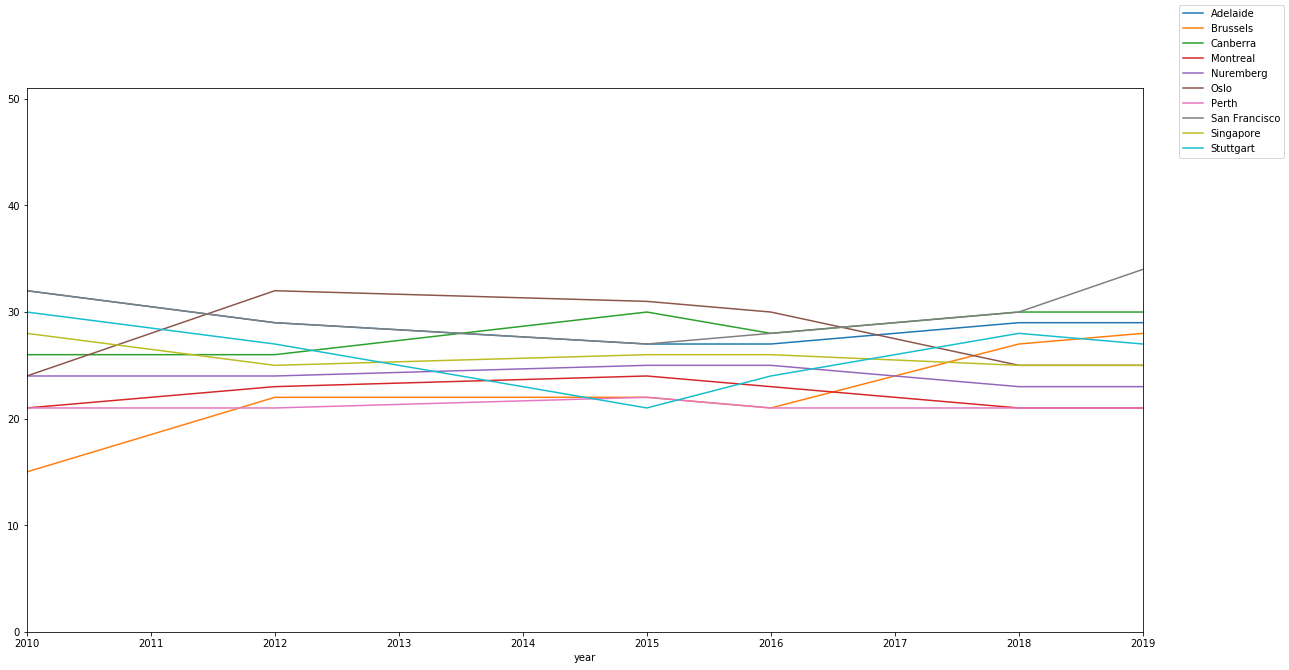

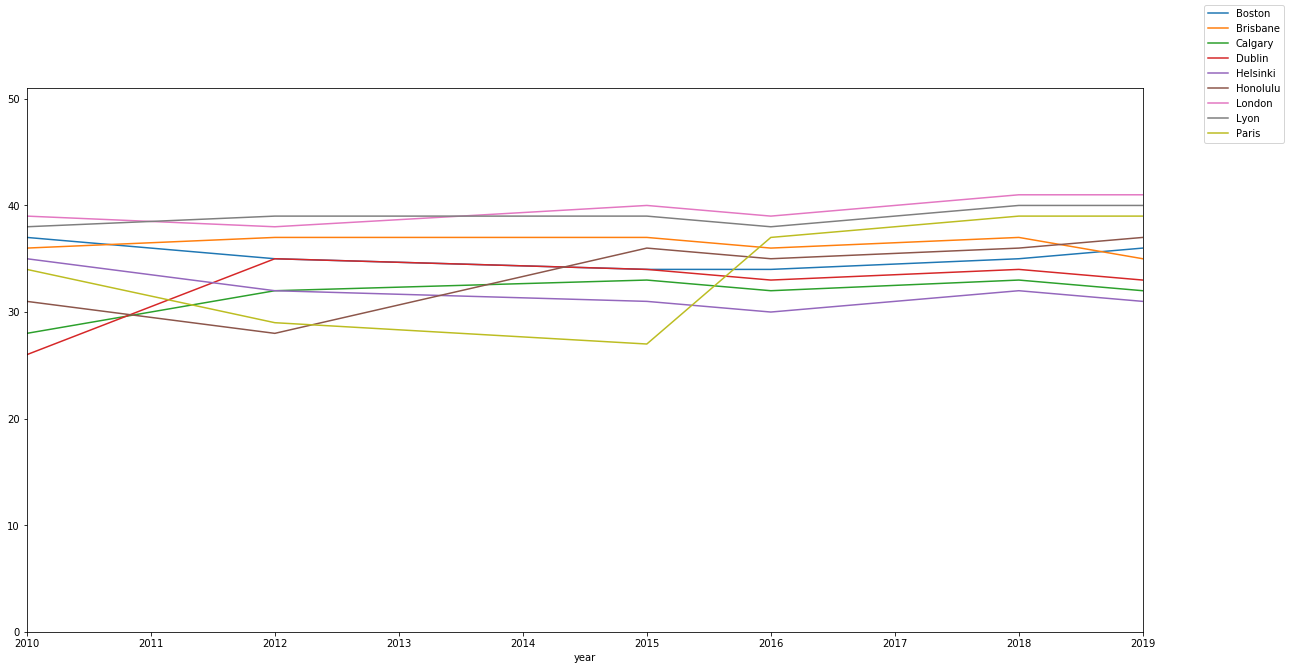

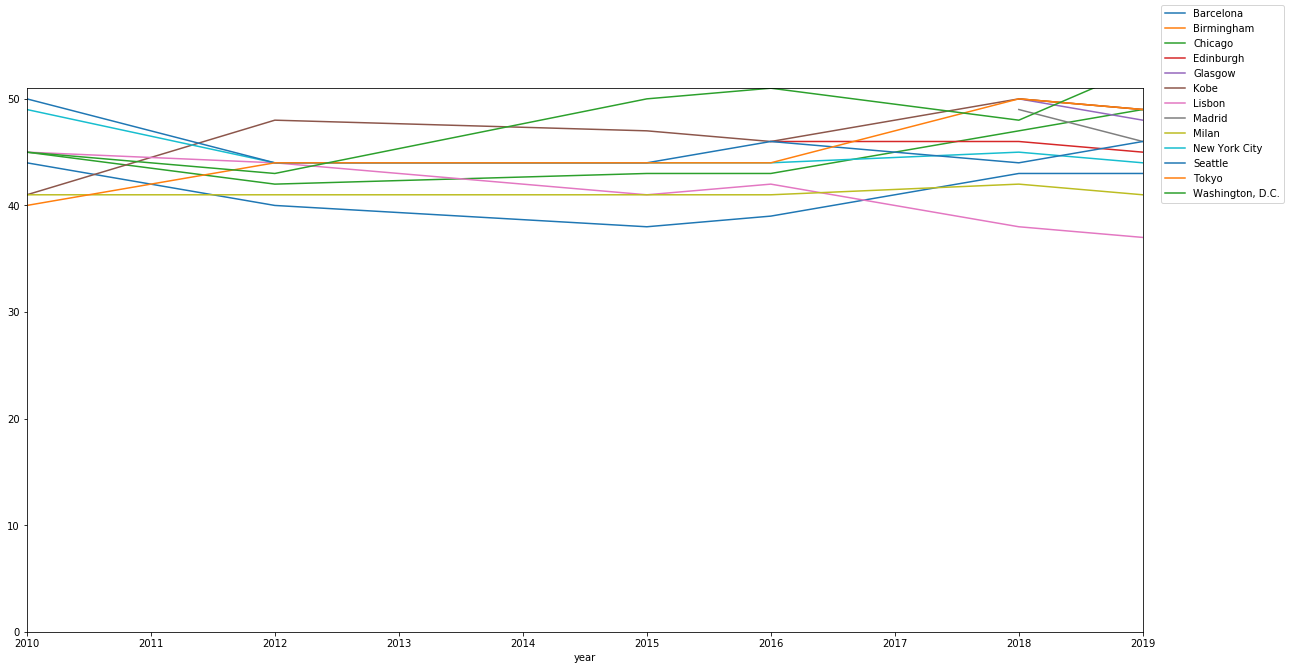

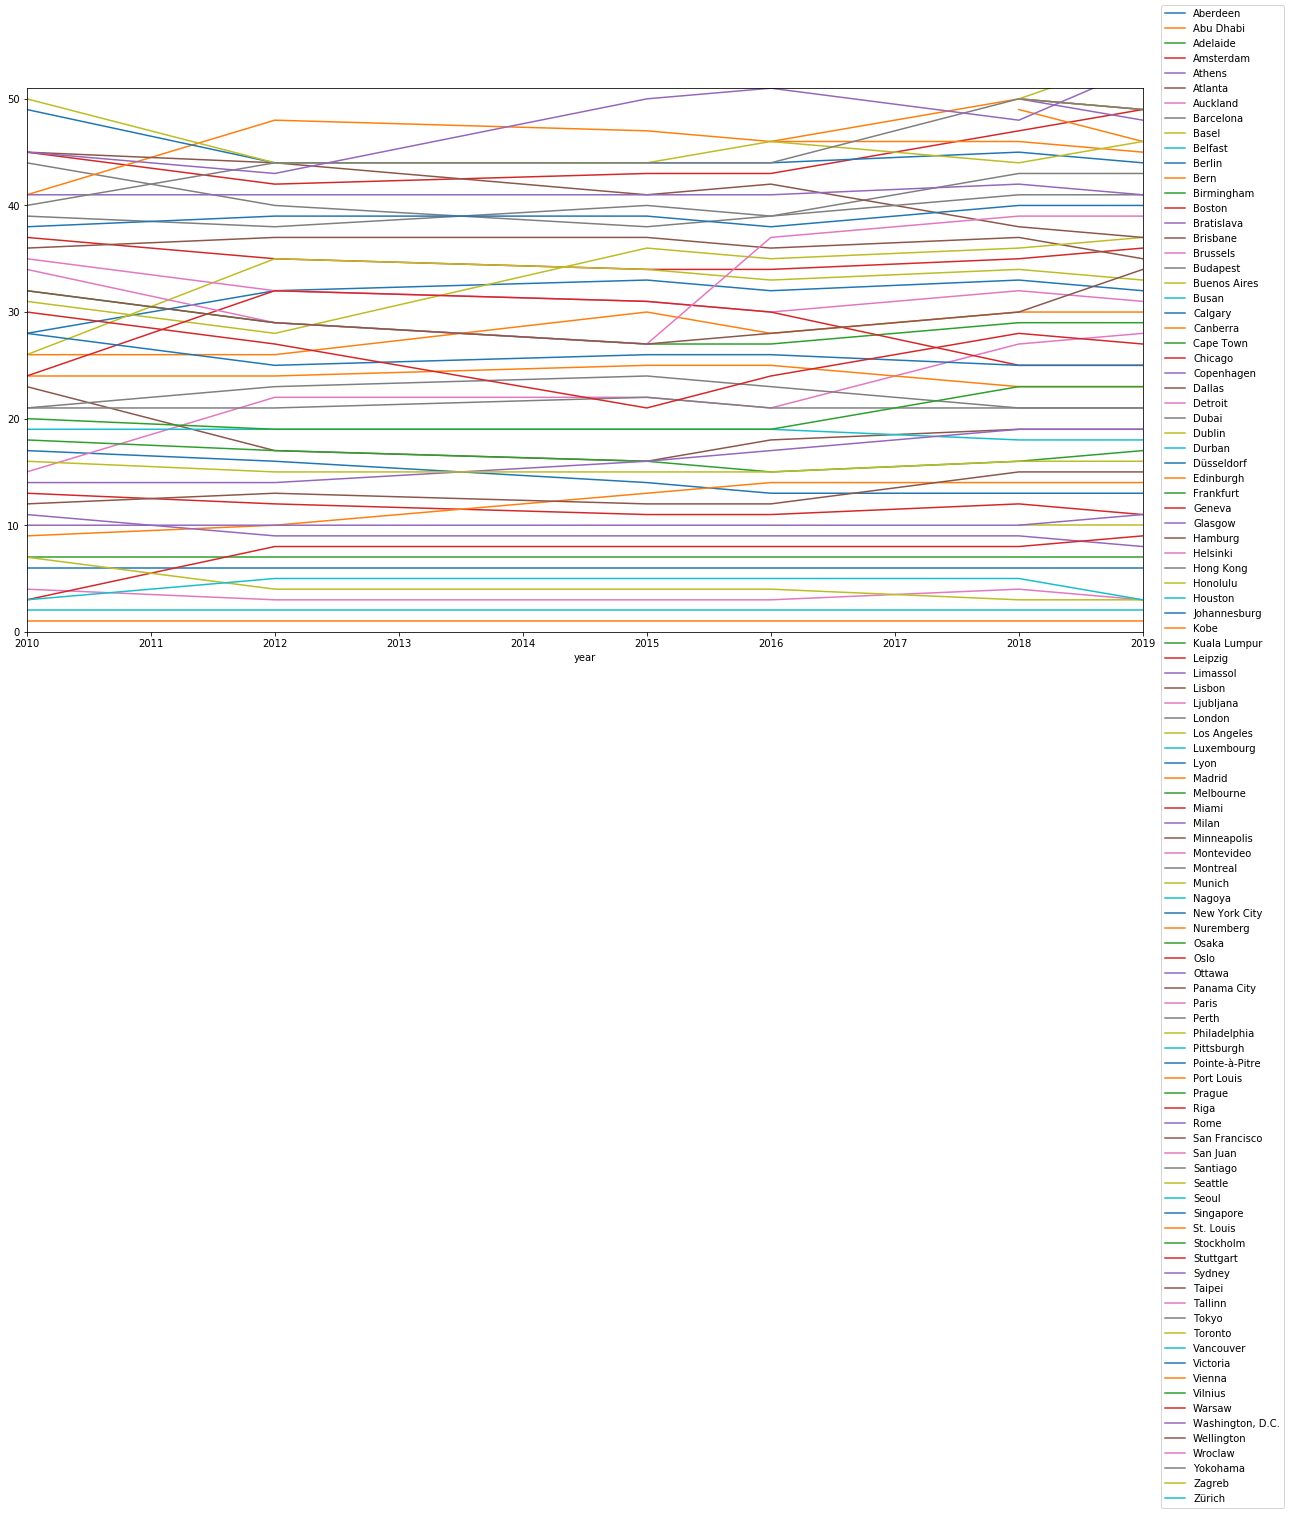

In [5]:
def getTopXCitiesByMedianThatOccurInEveryDataset(topX, dataset):
    mercer_data_topX = dataset[(dataset.groupby('City')['Rank'].transform('median') > topX - 10) & (dataset.groupby('City')['Rank'].transform('median') <= topX)]
    return mercer_data_topX
        
mercer_data_top10 = getTopXCitiesByMedianThatOccurInEveryDataset(10, mercer_data)
mercer_data_top20 = getTopXCitiesByMedianThatOccurInEveryDataset(20, mercer_data)
mercer_data_top30 = getTopXCitiesByMedianThatOccurInEveryDataset(30, mercer_data)
mercer_data_top40 = getTopXCitiesByMedianThatOccurInEveryDataset(40, mercer_data)
mercer_data_top50 = getTopXCitiesByMedianThatOccurInEveryDataset(50, mercer_data)


def plotRankingChangesOfData(cur_dataset, filename):
    fig = plt.figure(figsize=(20, 10))
    cur_dataset = cur_dataset.reset_index()
    cur_dataset.set_index(['year'], inplace=True)
    cur_dataset = cur_dataset.groupby('City')
    plt.ylim(0, 51)
    cur_dataset.Rank.plot()
    fig.legend()
    fig.savefig(filename)
    
plotRankingChangesOfData(mercer_data_top10, 'images/mercer/rankingChangeTop10.png')
plotRankingChangesOfData(mercer_data_top20, 'images/mercer/rankingChangeTop20.png')
plotRankingChangesOfData(mercer_data_top30, 'images/mercer/rankingChangeTop30.png')
plotRankingChangesOfData(mercer_data_top40, 'images/mercer/rankingChangeTop40.png')
plotRankingChangesOfData(mercer_data_top50, 'images/mercer/rankingChangeTop50.png')
plotRankingChangesOfData(mercer_data, 'images/mercer/rankingChange.png')

## Visualization of Ranking Changes in Numbeo-Data:


In contrary to mercer data you can see, that the rankings differ very much from year to year.

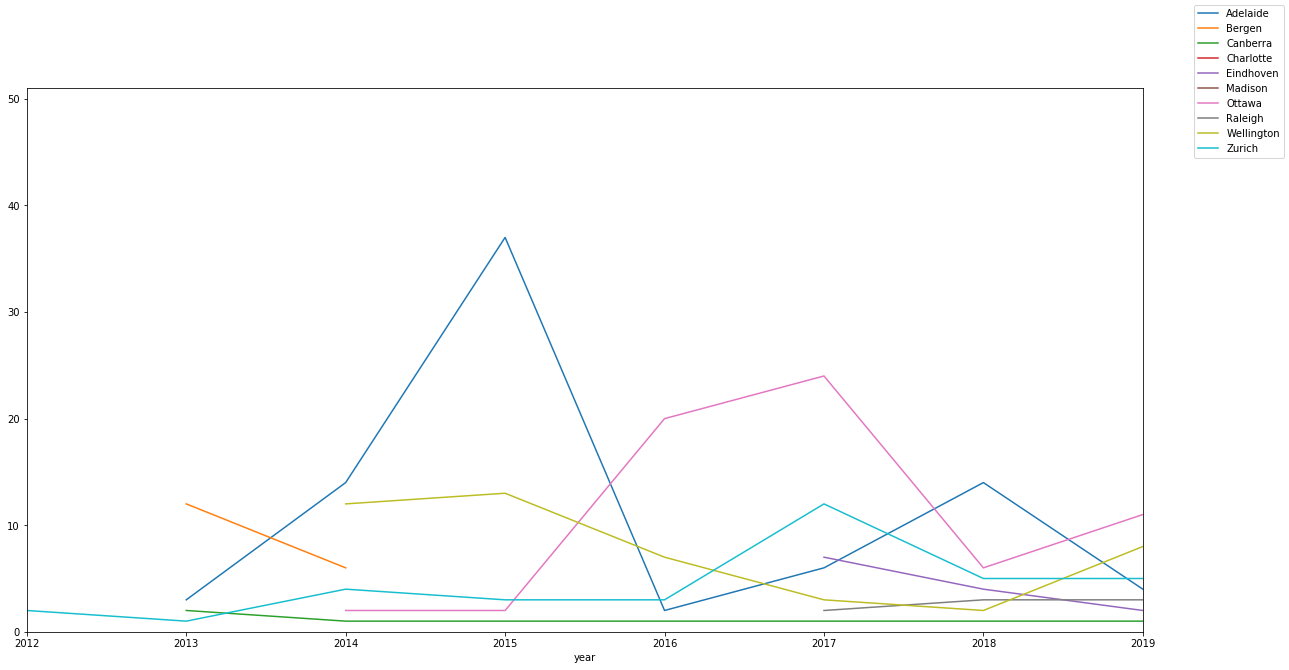

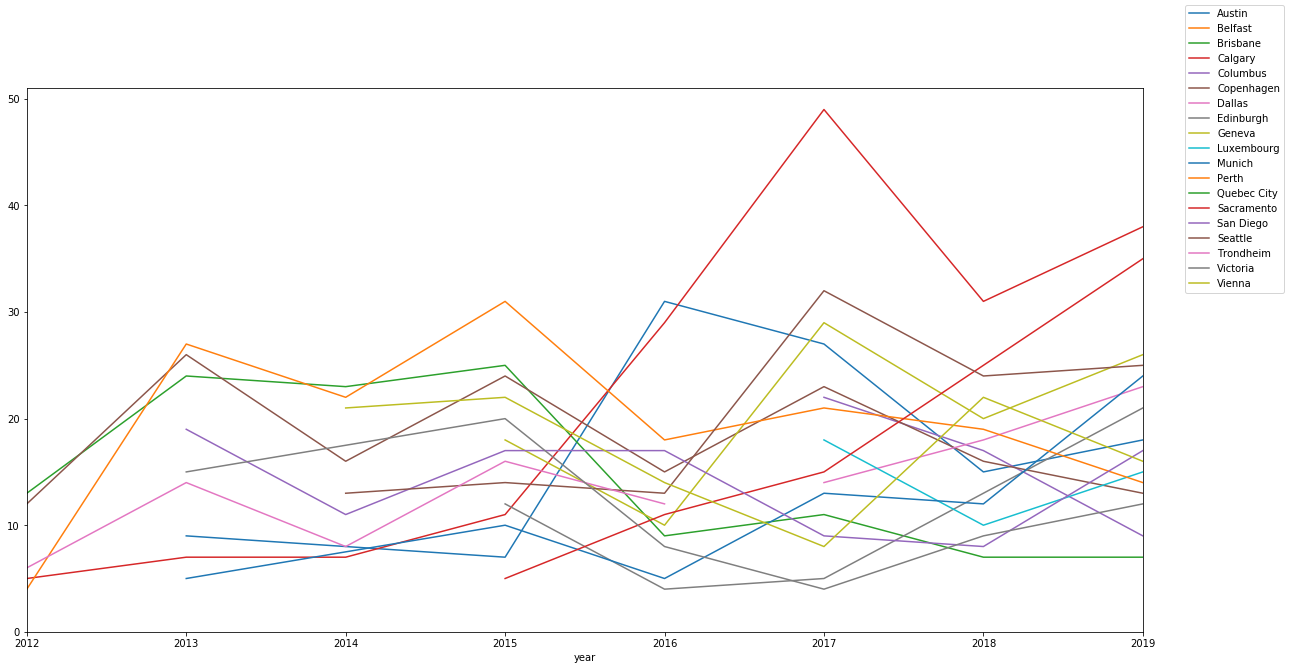

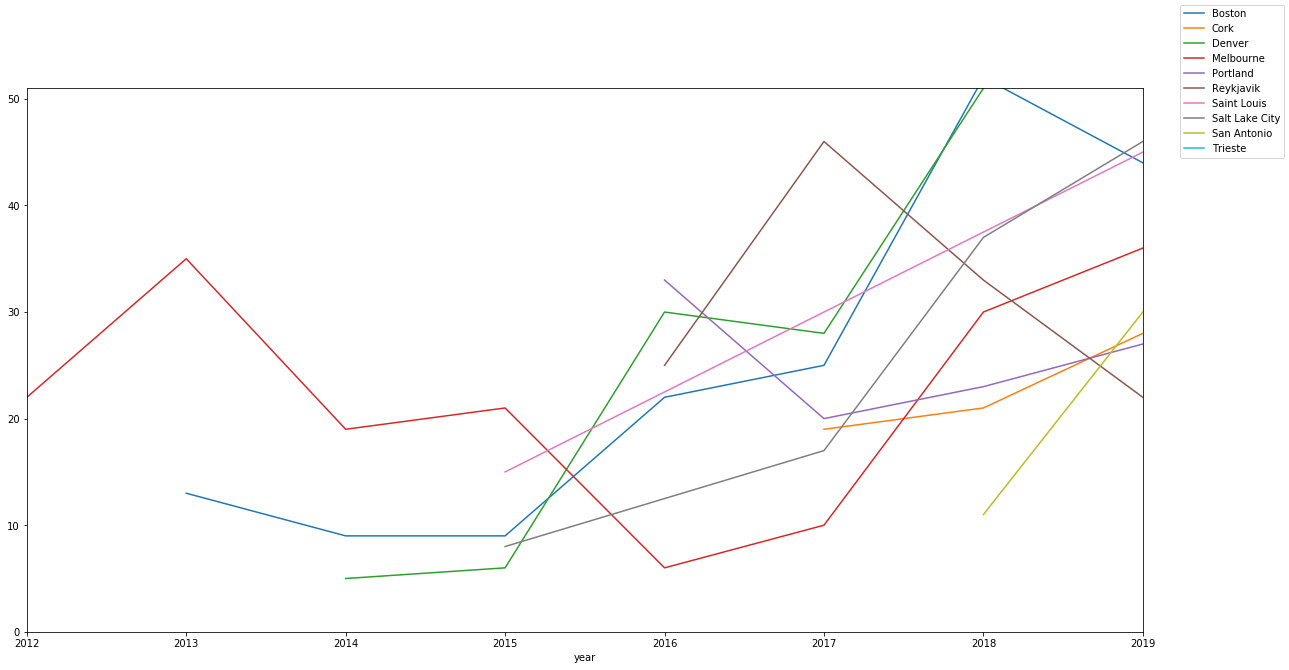

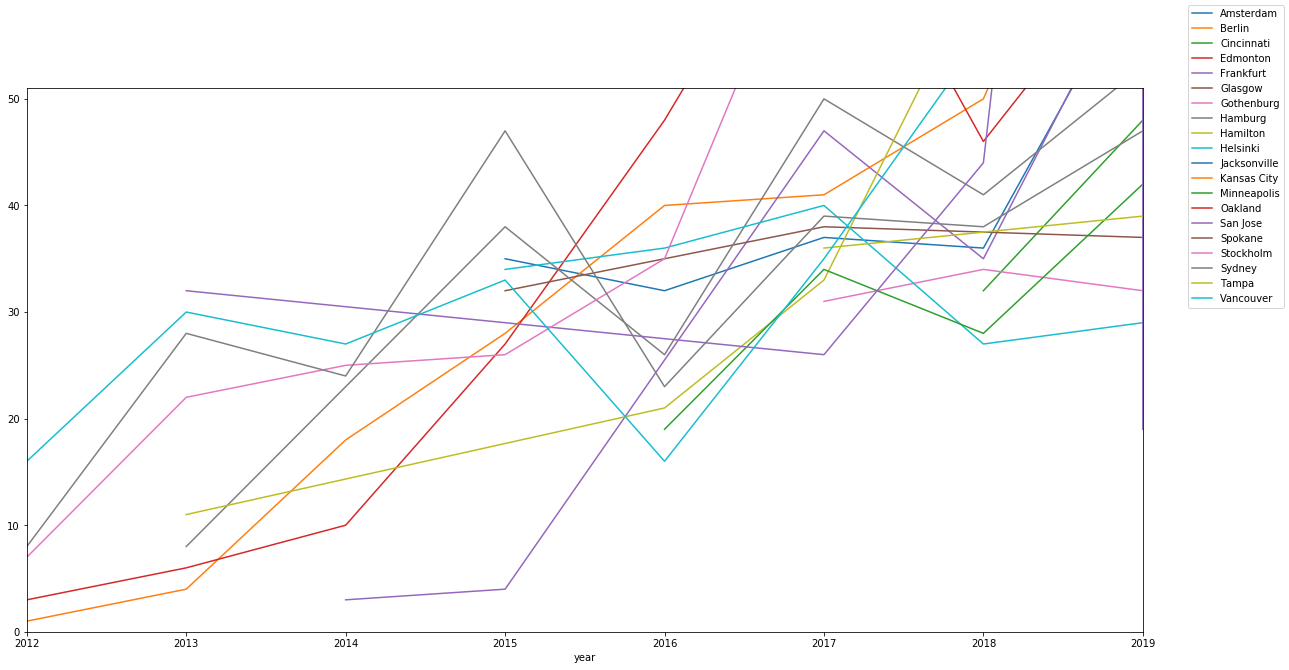

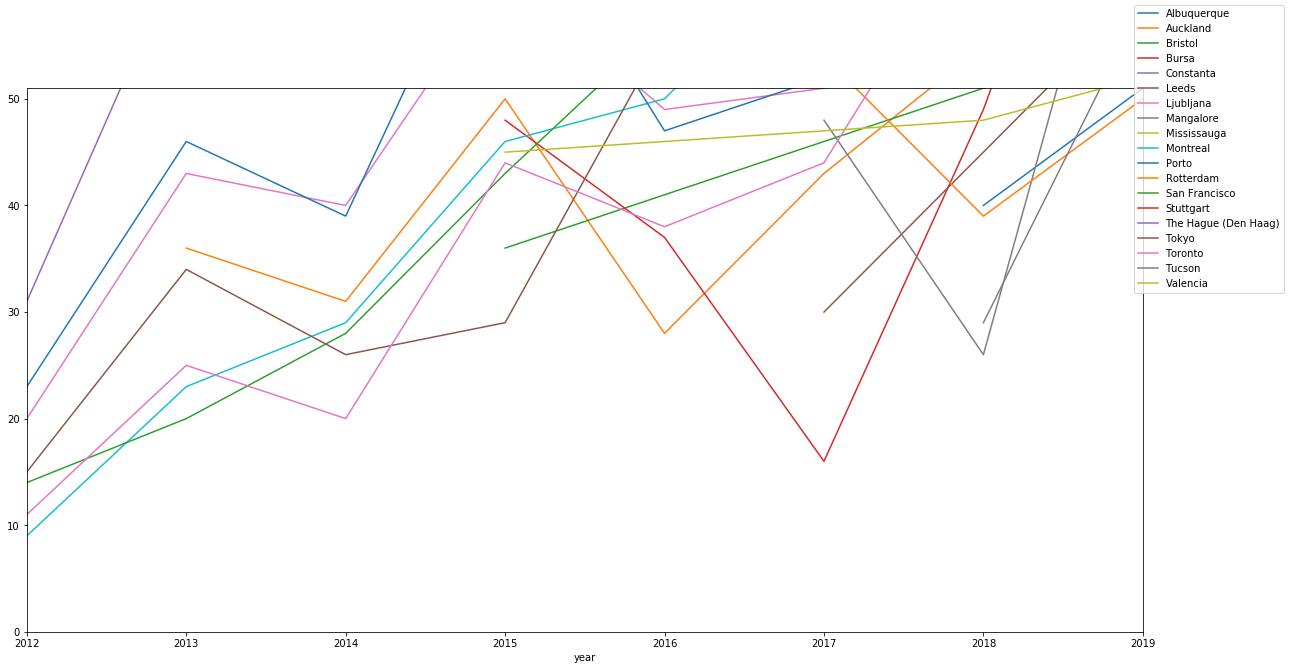

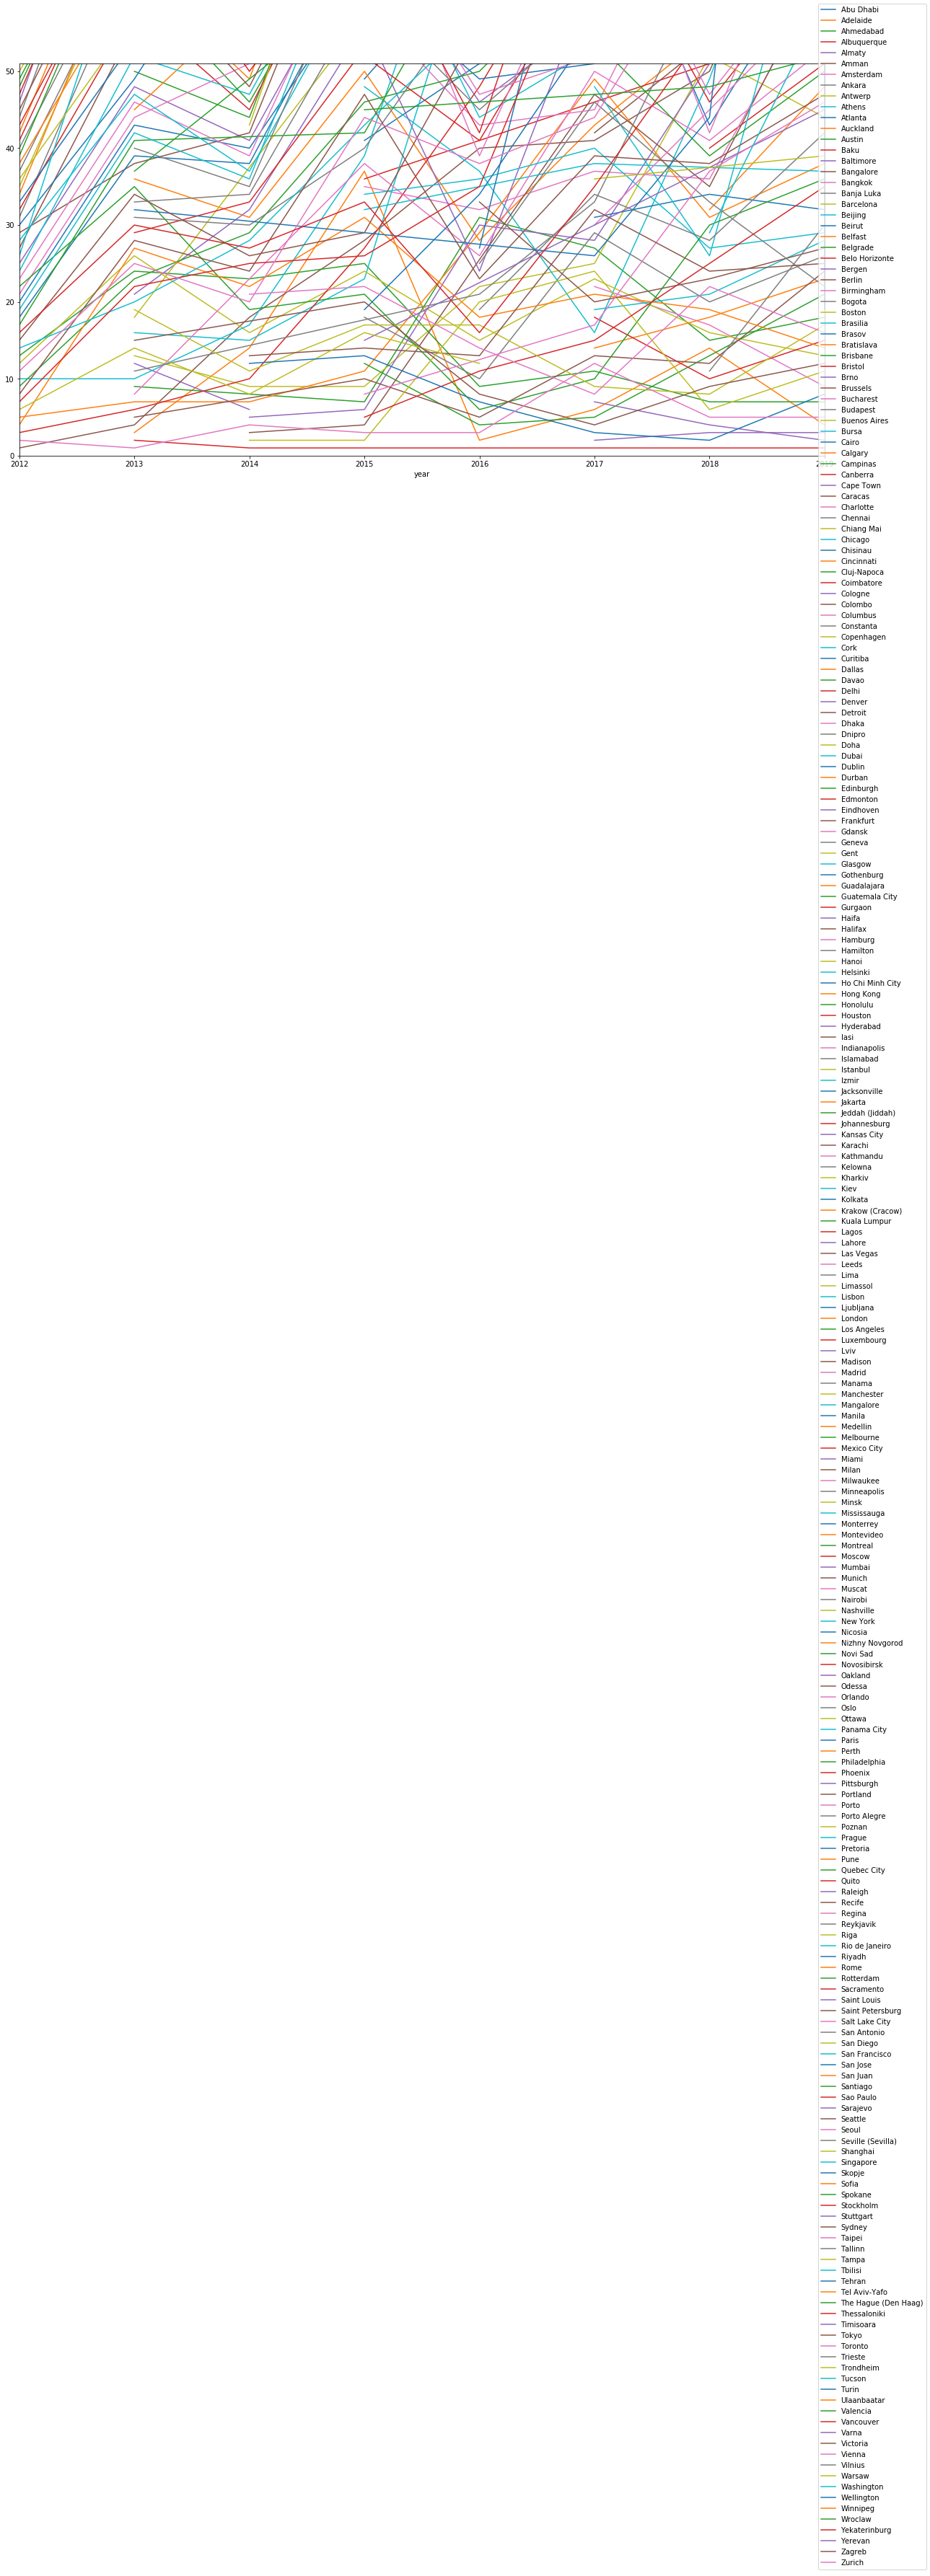

In [6]:
numbeo_data_top10 = getTopXCitiesByMedianThatOccurInEveryDataset(10, numbeo_city_data)
numbeo_data_top20 = getTopXCitiesByMedianThatOccurInEveryDataset(20, numbeo_city_data)
numbeo_data_top30 = getTopXCitiesByMedianThatOccurInEveryDataset(30, numbeo_city_data)
numbeo_data_top40 = getTopXCitiesByMedianThatOccurInEveryDataset(40, numbeo_city_data)
numbeo_data_top50 = getTopXCitiesByMedianThatOccurInEveryDataset(50, numbeo_city_data)

plotRankingChangesOfData(numbeo_data_top10, 'images/numbeo/rankingChangeTop10.png')
plotRankingChangesOfData(numbeo_data_top20, 'images/numbeo/rankingChangeTop20.png')
plotRankingChangesOfData(numbeo_data_top30, 'images/numbeo/rankingChangeTop30.png')
plotRankingChangesOfData(numbeo_data_top40, 'images/numbeo/rankingChangeTop40.png')
plotRankingChangesOfData(numbeo_data_top50, 'images/numbeo/rankingChangeTop50.png')
plotRankingChangesOfData(numbeo_city_data, 'images/numbeo/rankingChange.png')

## Calculation of mean-difference between ranking-dates of Mercer-Data:

In the following boxplots you can see for every change of year, how the ranking changes overall looked like. You can see that with mercer-data the highest ranking
changes between two year is 10 ranks.

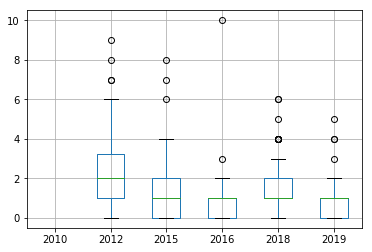

In [7]:
def calculateMedianRankingChangePerCityForMercerData():
    files = glob.glob('data/mercer_*.csv')
    datalist = []
    for file in files:
        year = int(file[12:16])
        df = pd.read_csv(file, sep=';', header=0, encoding='ISO-8859-1').assign(year=year)
        datalist.append(df)
    data = pd.concat(datalist)
    data = data.pivot(index='year', columns='City', values='Rank')
    data = data.diff()
    data = data.abs()
    data.T.boxplot()
    return data


mercer_data_groupedByCity = calculateMedianRankingChangePerCityForMercerData()

## Calculation of mean-difference between ranking-dates of Numbeo-Data:

In contrary to the boxplots of the mercer-data you can see higher ranking changes between the years with a maximum of 35 ranks. 

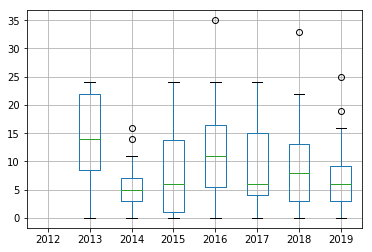

In [8]:
def calculateMedianRankingChangePerCityForNumbeoData():
    files = glob.glob('data/numbeo/quality-of-life-city/*.csv')
    datalist = []
    for file in files:
        year = int(file[33:37])
        df = pd.read_csv(file, sep=';', header=0).assign(year=year)
        datalist.append(df)
    data = pd.concat(datalist)
    data = data[data['Rank'] <= 50]
    data = data.pivot(index='year', columns='City', values='Rank')
    data = data.diff()
    data = data.abs()
    data.T.boxplot()
    return data

numbeo_data_groupedByCity = calculateMedianRankingChangePerCityForNumbeoData()

# How do these rankings correlate with each other?

The used methods for comparing the rankings with each other is with inter rater reliabiliy where the used methods are Cohens Kappa, Alpha and Scotts. 
As you can see, there is no real correlation  betwenn the datasets in any year. 

In [9]:
def calculateInterRater_ReliabilityKappa(year):
    numbeoDataCur = numbeo_city_data[(numbeo_city_data['Rank'] <= 50)  & (numbeo_city_data.index.get_level_values(0) == year)]
    mercerDataCur = mercer_data[(mercer_data['Rank'] <= 50) & (mercer_data.index.get_level_values(0) == year)]
    
    numbeoDataCur = numbeoDataCur[numbeoDataCur.index.get_level_values(1).isin(mercerDataCur.index.get_level_values(1))]
    mercerDataCur = mercerDataCur[mercerDataCur.index.get_level_values(1).isin(numbeoDataCur.index.get_level_values(1))] 
    
    numbeoDataCur.sort_values(['City'], ascending=True, inplace=True)
    mercerDataCur.sort_values(['City'], ascending=True, inplace=True)
    
    taskdata=[[0,str(i),str(numbeoDataCur.Rank[i])] for i in range(0,len(numbeoDataCur.Rank))] + [[1,str(i),str(mercerDataCur.Rank[i])] for i in range(0,len(mercerDataCur.Rank))]
    ratingtask = agreement.AnnotationTask(data=taskdata)
    print(str(year) + ": kappa " +str(ratingtask.kappa()))
    print(str(year) + ": alpha " +str(ratingtask.alpha()))
    print(str(year) + ": scotts " + str(ratingtask.pi()))
    
calculateInterRater_ReliabilityKappa(2012)
calculateInterRater_ReliabilityKappa(2015)
calculateInterRater_ReliabilityKappa(2016)
calculateInterRater_ReliabilityKappa(2018)
calculateInterRater_ReliabilityKappa(2019)


2012: kappa 0.030612244897959183
2012: alpha 0.03766233766233773
2012: scotts 0.012987012987012991
2015: kappa -0.01939393939393939
2015: alpha -0.013488657265481319
2015: scotts -0.03126916002452483
2016: kappa -0.01960784313725491
2016: alpha -0.011441647597253857
2016: scotts -0.03127383676582761
2018: kappa -0.020833333333333332
2018: alpha -0.011750881316098694
2018: scotts -0.036427732079905996
2019: kappa -0.017811704834605598
2019: alpha -0.009055627425614388
2019: scotts -0.03492884864165589
